In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

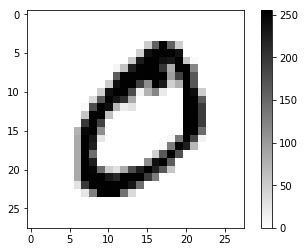

In [4]:
plt.figure()
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.colorbar()

In [5]:
train_images[1].shape

(28, 28)

In [6]:
train_images[1].max()

255

### Scale all values 

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
train_images[1].max()

1.0

### Flatten the Image Vectors and OneHot the Labels

In [19]:
train_images = train_images.reshape((-1, 784))

In [20]:
train_images.shape

(60000, 784)

In [26]:
train_labels = np.eye(10)[train_labels]
train_labels.shape

(60000, 10)

### View the Scaled Data

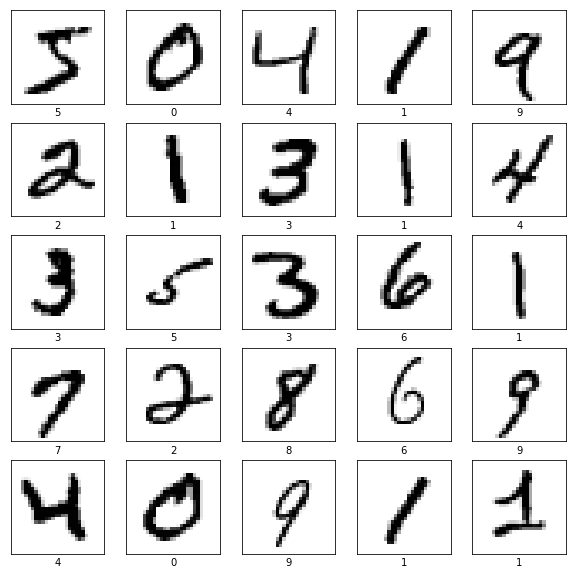

In [9]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_labels[i])
    plt.imshow(train_images[i], cmap=plt.cm.binary)

### DNN without Keras

In [10]:
input_layer = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10])) # Since there are 10 possible outcomes
bias = tf.Variable(tf.zeros([10]))

In [11]:
# Create graph operations
y = tf.matmul(input_layer, W) + bias

In [12]:
# Loss Function
y_true = tf.placeholder(tf.float32, [None, 10])

In [13]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [14]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [15]:
# Create Session
init = tf.global_variables_initializer()

In [27]:
batch_size = 100
with tf.Session() as sess:
    sess.run(init)
    
    for _ in range(1000):
        rand_idx = np.random.randint(len(train_images), size=batch_size)
        
        sess.run(train, feed_dict={input_layer: train_images[rand_idx], y_true: train_labels[rand_idx]})
        
        

In [23]:
train_labels.shape

(60000,)

In [25]:
np.eye(10)[train_labels]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])